<br>
<br>
<font size='6'><u><b>Distance scale with variable stars</b></u></font>
<br>

##### Written by Chien-Hsiu Lee, 2020

In this activity we are going to look at stars that change their magnitudes (brightness) in time. We can use a certain group of these stars to help estimate distances to other astronomical objects such as M31, our neighboring galaxy.

# Table of Contents

* [How to Use This Notebook](#How-to-Use-This-Notebook)
* [Pre-Activity Setup](#Pre-Activity-Setup)
* [Activity 1: Finding the period of a star](#Activity-1:-Finding-the-period-of-a-star)
* [Activity 2: Classifying the variable star](#Activity-2:-Classifying-the-variable-star)
* [Activity 3: Using Leavitt Law to estimate distance](#Activity-3:-Using-Leavitt-Law-to-estimate-distance)
___

# How to Use This Notebook

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [1]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
</div>

In [2]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

from ipywidgets import interactive, fixed
from IPython.display import display
import pdb
import os


print("Congrats! You have successfully run your first cell!")

Congrats! You have successfully run your first cell!


Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/
___

# Pre-Activity Setup

In order for any of the activities to work properly, you must import the libraries needed for the code in this notebook.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>

In [3]:
#fisrt we need to load some libraries/packages
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii


### Programming Side Note

The previous cell is a way of importing the necessary functions and other stuff to allow us to make pictures and do math super easy. In the next cell, we will be using a dictionary to easily group things together. Like how in a normal dictionary there is a word and a definition, this dictionary acts in a similar manner but instead of a word, we call it a key and instead of a definition we call it a value.

```python
dictionary = {key1 : value1, key2 : value2 ...}
```

# Activity 1: Finding the period of a star

In this exercise, we will learn how to display light curves (brightness as a function of time) and from the light curve, find the period of a variable star.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below to plot the light curve.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>The plot shows brightness over time for a star. Notice how it rises and falls, this star is changing with time!</b></font><br>

</div>



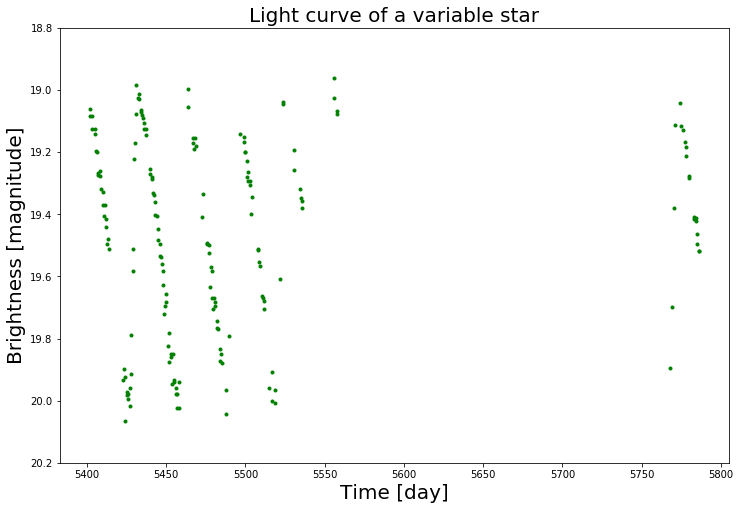

In [4]:
#we read in the observation data and plot the light curve
lc=ascii.read('cep1862r.tab')
mjd, mag, err = lc['col1'], lc['col2'], lc['col3']

plt.figure(figsize=(12, 8))
plt.plot(mjd, mag, 'g.')
plt.xlabel('Time [day]', size=20)
plt.ylabel('Brightness [magnitude]', size=20)
plt.title('Light curve of a variable star', size=20)
plt.ylim(20.2,18.8)
#plt.rc('font', weight='bold')
plt.rc('xtick.major', size=10, pad=10)
plt.rc('ytick.major', size=10, pad=10)
plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.show()

This is a good start and there appears to be a periodic nature to the star, so let's find the period.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below to find the period.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>The plots shows probability of the star pulsing with a certain period. Notice how some peaks are higher than others, these are likely period candidates!</b></font><br>

</div>



Finding optimal frequency:
 - Estimated peak width = 0.0164
 - Using 5 steps per peak; omega_step = 0.00327
 - User-specified period range:  0.1 to 1e+02
 - Computing periods at 19184 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
Best period: 30.864572200228128 days


/Users/cwalker/opt/anaconda3/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


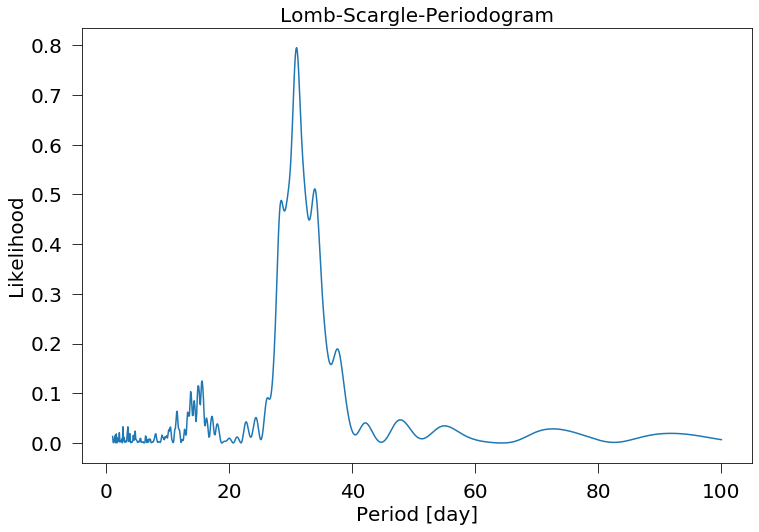

In [12]:
#now we use a package to find the period
from gatspy.periodic import LombScargleFast

ls=LombScargleFast()
ls.optimizer.period_range = (0.1,100)
ls.fit(mjd,mag)
period0=ls.best_period
print("Best period: " + str(period0) + " days")

#periodogram
periods = np.linspace(1,100,1000)
scores = ls.score(periods)
plt.figure(figsize=(12, 8))
plt.plot(periods,scores)
plt.xlabel("Period [day]", size=20)
plt.ylabel("Likelihood", size=20)
plt.title("Lomb-Scargle-Periodogram", size=20)
plt.show()


# Questions 1: Can you estimate the period from this diagram?



From the above diagram of likelihood versus period, you can probably determine the period of the variable star. But for arguments sake, let's play around with different periods, say from 10 to 60 days, and see which of their diagram of period versus brightness make sense.

<div class='alert alert-info'>
    <font size='3'><b>Run the cell below. Experiment with different values of the period.</b></font>
</div>

In [13]:
#print("Best period: " + str(period) + " days")
# put in a number between 10 and 60
#period=62
period=30.864572200228128

That was a great way to make sure we know the period. In fact, if we assume all the data sits on the same periodic function, we should be able to condense all the data to a single period, or "phased light curve". This will make it easier to read and see the period.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below to plot the phased light curve.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>The plots shows the light curve phased (folded) with the given period. You can clearly see the distinct shape of the Cepheid variaable, confirming that period we have in hand is correct!</b></font><br>

</div>



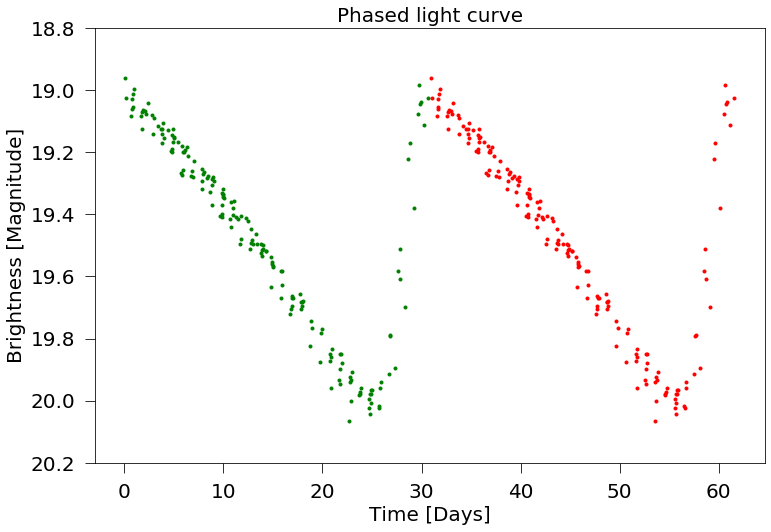

In [14]:
phase = np.zeros(shape=mjd.shape)
phase = np.fmod(mjd/period,1)

plt.figure(figsize=(12, 8))
plt.plot(phase*period,mag,"g.")
plt.plot((phase+1)*period,mag,"r.")
plt.ylim(20.2,18.8)
plt.xlabel('Time [Days]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.title('Phased light curve', size=20)
plt.show()

<div class='alert alert-warning'>
    <font size='3'><b>The interactive plot allows you to play around with different period. See how the plot changes if you phase it with wrong period values!</b></font><br>

</div>



In [15]:
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 18

def plot_lc(period=60):
    phase = np.zeros(shape=mjd.shape)
    phase = np.fmod(mjd/period,1)
    plt.plot(phase*period,mag,"g.")
    plt.plot((phase+1)*period,mag,"r.")
    plt.ylim(20.2,18.8)
    plt.xlabel('Time [Days]', size=20)
    plt.ylabel('Brightness [Magnitude]', size=20)
    plt.title('Phased light curve', size=20)
    plt.show()

interactive_plot = interactive(plot_lc, period=(25.,40.,1.))
display(interactive_plot)


interactive(children=(FloatSlider(value=40.0, description='period', max=40.0, min=25.0, step=1.0), Output()), …

# Activity 2: Classifying the variable star 

In this exercise, we will learn how to use a series of cosine and sine functions to model a light curve (so-called Fourier decomposition):

$f(\phi) = \sum_{i=1}^n a_i cos(2\pi i \phi) + b_i sin(2\pi i \phi)$, 

where $\phi$ denotes the phase of the light curve and $a_i$ and $b_i$ are the coefficients of the i-th cos() and sin() terms. We will also learn how we can use the resulting coefficients to classify the type of variable star.  

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below to model the light curve.</b></font>
</div>

In [16]:
#definition of Fourier decomposition function
from scipy import optimize
pi=3.1415
def FourierDecomp(x, a0, a1, a2,a3,a4, b1, b2, b3, b4):
    return a0 + a1 * np.cos(2*pi* x) + a2 * np.cos(2*pi*2*x) + a3*np.cos(2*pi*3*x) + a4*np.cos(2*pi*4*x) + b1*np.sin(2*pi*x) + b2*np.sin(2*pi*2*x) + b3*np.sin(2*pi*3*x) + b4*np.sin(2*pi*4*x) 

#fit the light curve and show coefficients
params, params_covariance = optimize.curve_fit(FourierDecomp, phase, mag, p0=[19.5, 0, 0, 0, 0, 0, 0, 0, 0])

print(params)

[ 1.94966722e+01 -1.94155715e-01 -1.54943059e-01 -8.38526470e-02
 -3.34784959e-02 -3.48366141e-01 -6.25446030e-02  1.35368772e-02
  2.94198651e-02]


And plot the resulting curve on the data

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below to plot the modeled light curve.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>This plots compares the modelled light curves (black line) with real data (red points). Looks like the model is doing a good job!</b></font><br>

</div>



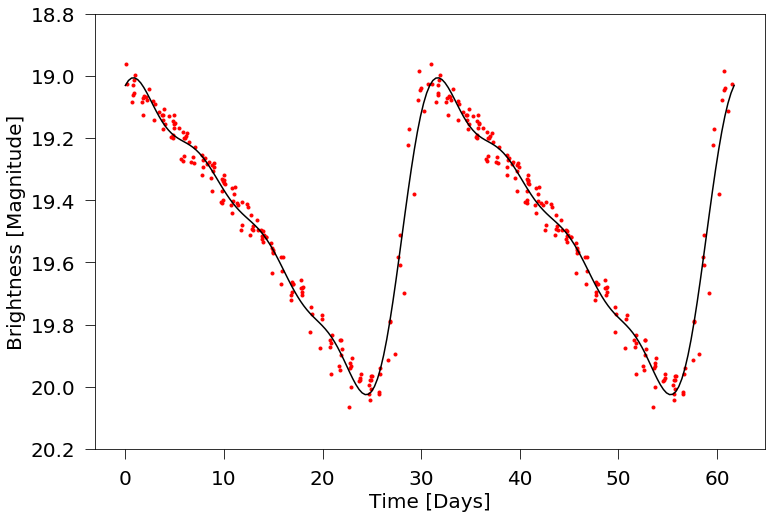

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(phase*period, mag, "r.", label='Data')
plt.plot((phase+1)*period, mag, "r.", label='Data')
p2=np.linspace(0,1,100)
plt.plot(p2*period, FourierDecomp(p2, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8]), color='black', label='Fitted function')
plt.plot((p2+1)*period,FourierDecomp(p2, params[0], params[1], params[2], params[3], params[4], params[5], params[6], params[7], params[8]), color='black', label='Fitted function')
plt.xlabel('Time [Days]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.ylim(20.2,18.8)
plt.show()

From the light curve, use coefficients a4 and a2 to determine a4/a2 vs period.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below to find out the parameters of the modeled light curve.</b></font>
</div>

In [18]:
print ("a4/a2: ",abs(params[4]/params[2]), "log period: ", np.log10(period))

a4/a2:  0.21606967095470947 log period:  1.489460261786917


# Questions 2: Using a4/a2 and the period, can you detemine the type of this variable?

To determine the type of variable star from the period, check the classification diagram: 

<div class='alert alert-warning'>
    <font size='3'><b>Can you use the coefficients to type the variables?</b></font><br>

</div>

<img src="TeenCafeClass.jpeg">

Now use this period with the Leavitt Law to determine luminosity (i.e., absolute magnitude or intrinsic brightness) and with that, get the distance. 

# Activity 3: Using Leavitt Law to estimate distance

In this exercise, we will fit the data to determine the coefficients of Leavitt law, and from that, we can estimate the distance to our nearest spiral galaxy, M31.

<img src="TeenCafeDistance.jpeg">


<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to see the period-luminosity relation of Cepehids in Andromeda.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>This plots shows the period vs. brightness of Cepheids from Andromeda. Notice there are two difference populations of Cepheids, and how they distribute following the Leavitt law!</b></font><br>

</div>



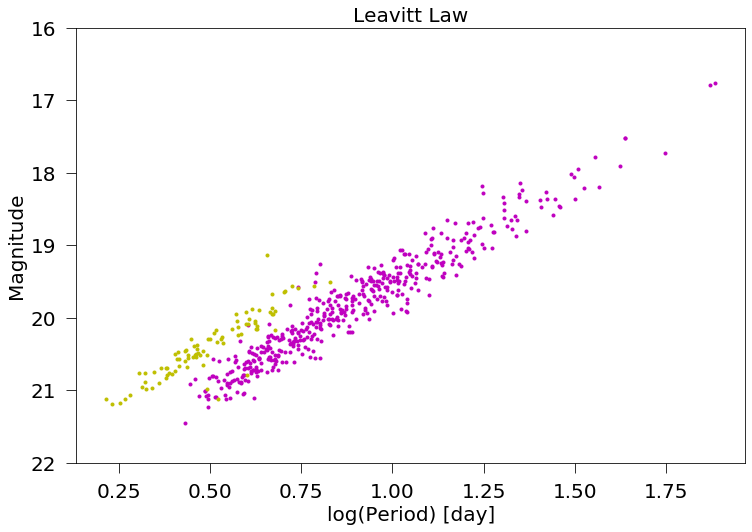

In [19]:
#read in data of Andromeda Cepheids
cep=ascii.read('cep.tab')
per, jmag, hmag, typ = cep['col1'], cep['col2'], cep['col3'], cep['col4']

plt.figure(figsize=(12, 8))
plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')
plt.plot(np.log10(per[cep['col4'] == 'FO']), jmag[cep['col4'] == 'FO'], 'y.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Magnitude', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(22,16)
plt.show()

By fitting a line to the data in the diagram above (showing the Leavitt Law), the absolute magnitude (or luminosity) can be found. With the equation for a line: 

$y = ax + b$, 

coefficient "a" is the slope of the line and coefficient "b" is the y value when x is zero. That y value is the absolute magnitude or luminosity of the variable star with a period of one day or log(0)=1. This value will be M1 in Question 3 below.


<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to find a linear relation of the Cepheids in M31.</b></font>
</div>



In [20]:
def Linear(x, a, b):
    return a*x + b 

params, params_covariance = optimize.curve_fit(Linear, np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], p0=[-1,22])

print ("y = a*x + b, a=", params[0], " b=", params[1])

y = a*x + b, a= -2.8605633191680115  b= 22.36516565698167


<div class='alert alert-warning'>
    <font size='3'><b>Fun fact: we may get used to define the linear relation as "y = m*x + y0", where m is the slope and y0 is the intercept on y-axis. But m can be misleading here because it can also mean magnitude, so we chose to use "y = a*x + b" instead. </b></font><br>

</div>

<img src="TeenCafeClass.jpeg">

<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to plot the relation along with the data.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>This plots shows the period vs. brightness of Cepheids from Andromeda, and the linear relation we derive. See how good they match with each other!</b></font><br>

</div>


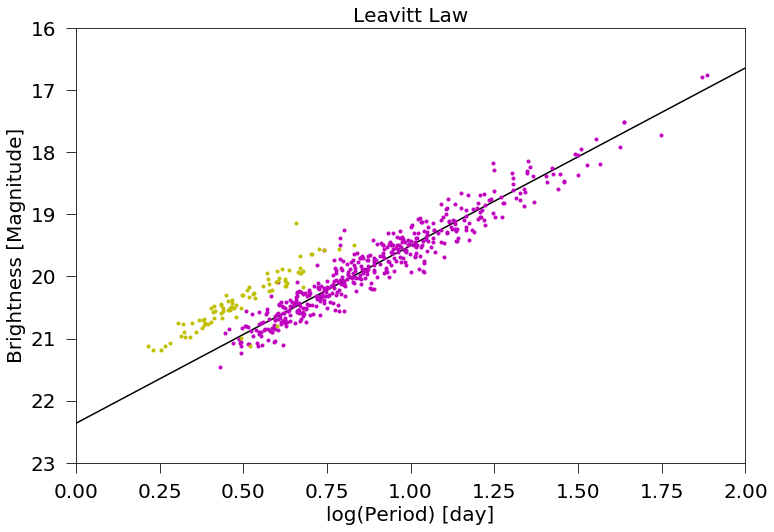

In [21]:
ppp=np.linspace(1,100,100)
#print p2

plt.figure(figsize=(12, 8))
plt.plot(np.log10(ppp), Linear(np.log10(ppp), params[0], params[1]), color='black', label='Fitted function')

plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')
plt.plot(np.log10(per[cep['col4'] == 'FO']), jmag[cep['col4'] == 'FO'], 'y.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(23,16)
plt.xlim(0,2)
plt.show()

# Question 3: Can you estimate the distance to Andromeda galaxy?

We can use the distance modulus to convert magnitude to distance:

$M_1 - M_2 = 5 \times log_{10}\frac{d_1}{d_2}$

or in terms of distance (d1):

$d_1 = d_2 \times 10^{(M1-M2)/5}$

Here $M_1$ is the apparent magnitude of the Cepheids in Andromeda, $d_1$ is the distance to Andromeda. $M_2$ is the absolute magnitude (or reference magnitude) and $d_2$ is the reference distance we use to define the absolute magnitude (which is set to 10 pc).

To get $d_1$, what value for $M_1$ do you need to use from the Leavitt Law above?
See previous paragraph before Question 3.

Info you will need for $M_2$ and $d_2$: a 1-day period Cepheid has absolute brightness of -2.1 magnitude at 10 pc.

You can use Python as a calculator to determine the distance. Try it yourself using pow(base,exponent) for base^(exponent). Check your answer with the distance here: https://en.wikipedia.org/wiki/Andromeda_Galaxy

<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to calculate distance to the Andromeda galaxy.</b></font>
</div>



In [22]:
#Now fill in M1, M2, and d2 below to get d1
M1 = 22.36516566
M2 = -2.1
d2 = 10

d1 = d2 * pow(10,(M1-M2)/5.)

print ("Distance to Andromeda =", d1)

Distance to Andromeda = 781687.4366613891


# Bonus question: Can you estimate the distance to Large Magellanic Cloud?

<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to see Cepheids in the Large Magellanic Cloud.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>This plots shows the period vs. brightness of Cepheids from Large Magellanic Cloud. Notice there are two difference populations of Cepheids, and how they distribute following the Leavitt law!</b></font><br>

</div>

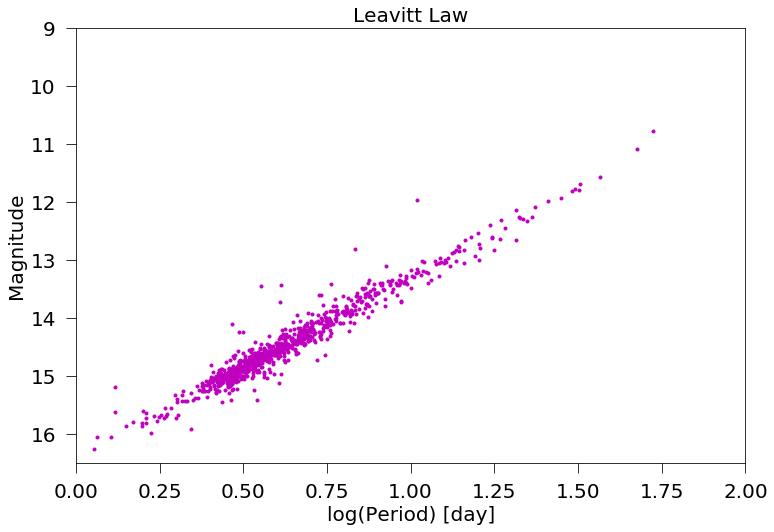

In [23]:
#read in data of LMC Cepheids
cep=ascii.read('lmc.tab')
per, jmag, hmag, typ = cep['col1'], cep['col2'], cep['col3'], cep['col4']

plt.figure(figsize=(12, 8))
plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Magnitude', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(16.5,9)
plt.xlim(0.0,2)
plt.show()

<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to find a linear relation of the Cepheids in LMC.</b></font>
</div>

<div class='alert alert-warning'>
    <font size='3'><b>This plots shows the period vs. brightness of Cepheids from Large Magellanic Cloud, and the linear relation we derive. See how good they match with each other!</b></font><br>





y = a*x + b, a= -3.118253235971904  b= 16.41141536062039


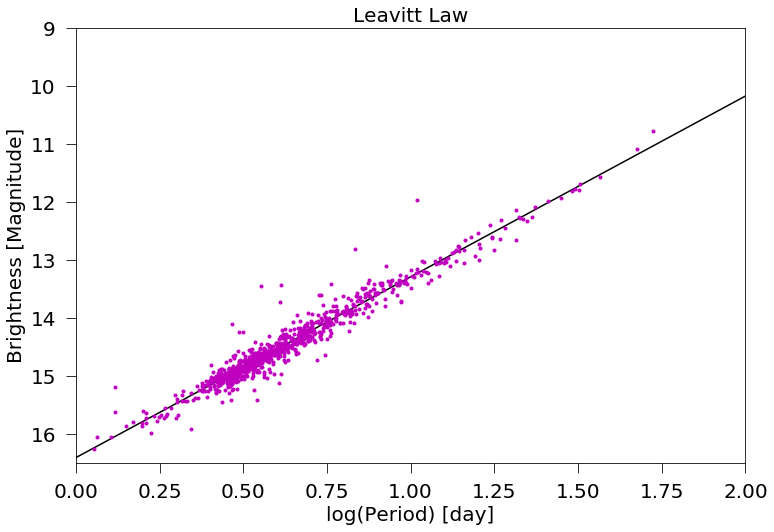

In [24]:
params, params_covariance = optimize.curve_fit(Linear, np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], p0=[-1,22])

print ("y = a*x + b, a=", params[0], " b=", params[1])
ppp=np.linspace(1,500,100)
#print p2

plt.figure(figsize=(12, 8))
plt.plot(np.log10(ppp), Linear(np.log10(ppp), params[0], params[1]), color='black', label='Fitted function')

plt.plot(np.log10(per[cep['col4'] == 'FM']), jmag[cep['col4'] == 'FM'], 'm.')

#plt.xscale("log")
plt.xlabel('log(Period) [day]', size=20)
plt.ylabel('Brightness [Magnitude]', size=20)
plt.title('Leavitt Law', size=20)
plt.ylim(16.5,9)
plt.xlim(0,2)
plt.show()


<div class='alert alert-info'>
    <font size='3'><b>Run the cell below to calculate distance to the Large Magellanic Cloud.</b></font>
</div>



In [25]:
#Now fill in M1, M2, and d2 below to get d1
M1 = 16.41141536062039
M2 = -2.1
d2 = 10

d1 = d2 * pow(10,(M1-M2)/5.)

print ("Distance to LMC =", d1)

Distance to LMC = 50382.88962799552
